# Stock market med Naive-Bayes

In [12]:
import yfinance as yf
import pandas_datareader as pdr
import pandas as pd
import numpy as np 
import datetime
import pytz

In [13]:

snp = yf.Ticker("^GSPC").history(period="5y", actions=False)
snp["Daily"] = (1 - (snp["Open"] / snp["Close"])) * 100
snp["Volatility"] = (1 - (snp["Low"] / snp["High"]))
snp = snp.drop(columns=["High", "Low", "Close", "Open"])
df = snp["Daily"]

snp["Lag1"] = df.shift(1, fill_value=0)
snp["Lag2"] = df.shift(2, fill_value=0)
snp["Lag3"] = df.shift(3, fill_value=0)
snp["Lag4"] = df.shift(4, fill_value=0)
snp["Lag5"] = df.shift(5, fill_value=0)

snp.head()


,Volume,Daily,Volatility,Lag1,Lag2,Lag3,Lag4,Lag5
Date,,,,,,,,
2020-04-02 00:00:00-04:00,6464190000,2.705286,0.030566,0.000000,0.000000,0.000000,0.000000,0.0
2020-04-03 00:00:00-04:00,6096970000,-1.055593,0.030817,2.705286,0.000000,0.000000,0.000000,0.0
2020-04-06 00:00:00-04:00,6403840000,3.206087,0.038209,-1.055593,2.705286,0.000000,0.000000,0.0
2020-04-07 00:00:00-04:00,7050410000,-2.979608,0.035990,3.206087,-1.055593,2.705286,0.000000,0.0
2020-04-08 00:00:00-04:00,5875710000,2.362926,0.035298,-2.979608,3.206087,-1.055593,2.705286,0.0


In [17]:
split = datetime.datetime(2022, 1, 1, 0, 0, tzinfo=pytz.timezone("America/New_York"))
train = snp[snp.index <= split]
test = snp[snp.index > split]

X_train, y_train = train.drop(["Daily"], axis ="columns"), np.sign(train["Daily"])
X_test , y_test = train.drop(["Daily"], axis ="columns"), np.sign(train["Daily"])

X_train = X_train[5:]
y_train = y_train[5:]

X_train


,Volume,Volatility,Lag1,Lag2,Lag3,Lag4,Lag5
Date,,,,,,,
2020-04-09 00:00:00-04:00,7899550000,0.019943,2.362926,-2.979608,3.206087,-1.055593,2.705286
2020-04-13 00:00:00-04:00,5319530000,0.022027,0.459889,2.362926,-2.979608,3.206087,-1.055593
2020-04-14 00:00:00-04:00,5615730000,0.016393,-0.754268,0.459889,2.362926,-2.979608,3.206087
2020-04-15 00:00:00-04:00,5208000000,0.014397,1.439181,-0.754268,0.459889,2.362926,-2.979608
2020-04-16 00:00:00-04:00,5228810000,0.015033,-0.441186,1.439181,-0.754268,0.459889,2.362926
...,...,...,...,...,...,...,...
2021-12-27 00:00:00-05:00,2770290000,0.012000,0.461935,0.983703,1.167290,-0.435197,-0.689512
2021-12-28 00:00:00-05:00,2707920000,0.005613,1.193852,0.461935,0.983703,1.167290,-0.435197
2021-12-29 00:00:00-05:00,2963310000,0.005408,-0.190963,1.193852,0.461935,0.983703,1.167290


              precision    recall  f1-score   support

        -1.0       0.18      0.54      0.27        63
         1.0       0.88      0.58      0.70       379

    accuracy                           0.57       442
   macro avg       0.53      0.56      0.48       442
weighted avg       0.78      0.57      0.64       442



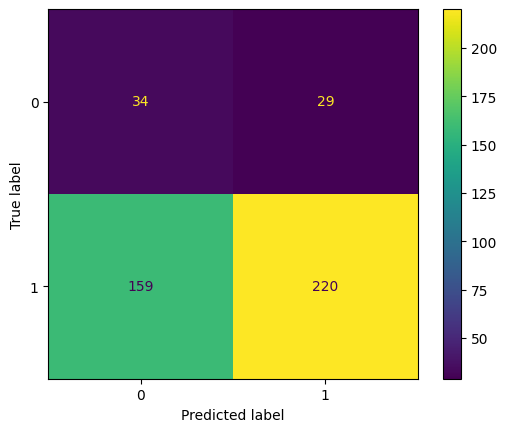

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_pred, y_test))
cm = confusion_matrix(y_pred, y_test)
plot = ConfusionMatrixDisplay(cm)

plot.plot();


              precision    recall  f1-score   support

        -1.0       0.45      0.50      0.47       175
         1.0       0.65      0.60      0.62       267

    accuracy                           0.56       442
   macro avg       0.55      0.55      0.55       442
weighted avg       0.57      0.56      0.56       442



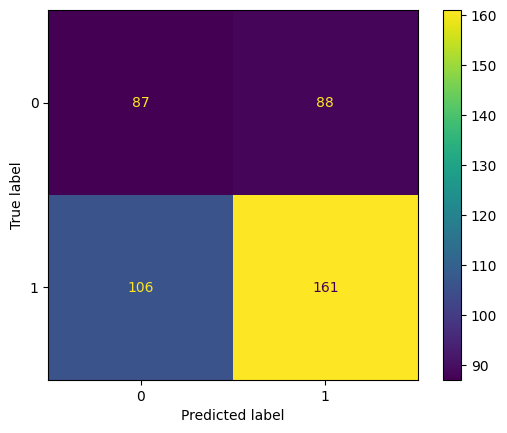

In [28]:
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler

model = ComplementNB()
scaler = MinMaxScaler()

scaled_data_x_train = scaler.fit_transform(X_train)
scaled_data_x_test = scaler.transform(X_test)

model.fit(scaled_data_x_train, y_train)
y_pred = model.predict(scaled_data_x_test)


print(classification_report(y_pred, y_test))
cm = confusion_matrix(y_pred, y_test)
plot = ConfusionMatrixDisplay(cm)

plot.plot();